# Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

## 1) Import necessary librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## 2) Loading and preparing data

Dataset's link : https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download

In [3]:
df = pd.read_csv("Mall_Customers.csv").drop("CustomerID", axis = 1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## 3) Data Exporation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


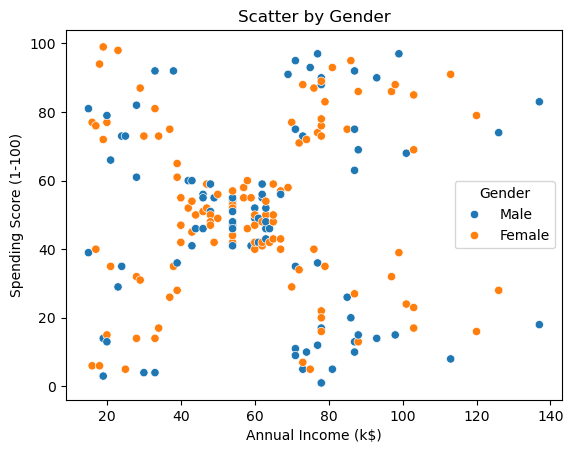

In [5]:
sns.scatterplot(data = df, x='Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Gender')
plt.title("Scatter by Gender")

plt.show()

#### Coment : Imposssible to use gender as the base for clustering

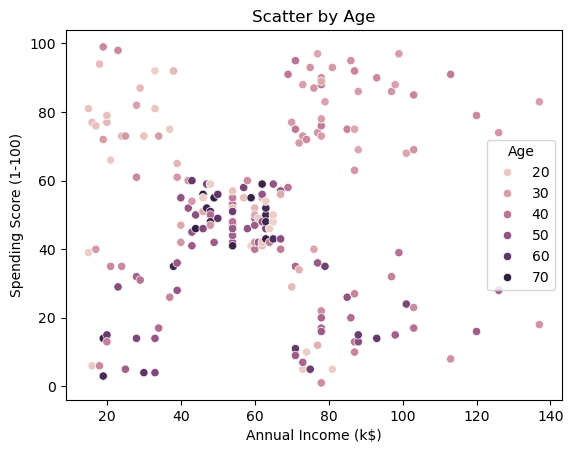

In [6]:
sns.scatterplot(data = df, x='Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Age')
plt.title("Scatter by Age")

plt.show()

## 4) Data preprocessing

#### Trying work w/o age in X

In [7]:
# Without age in X

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
age = df['Age']

In [8]:
# Without age in X

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

In [9]:
# With age in X

X_age = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
age = df['Age']

In [10]:
# With age in X

scaler = StandardScaler()
X_age = scaler.fit_transform(X_age)
X_age = pd.DataFrame(X_age, columns=['Annual Income (k$)', 'Spending Score (1-100)', 'Age'])

## 5) Modelisation/clustering

#### Choose the number of clusters with the best silhouette score

c:\Users\bella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

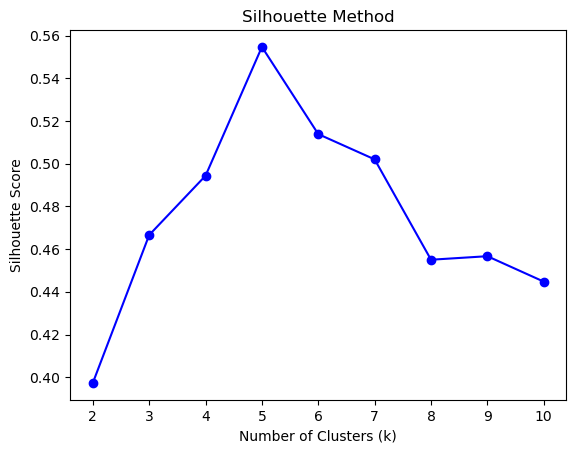

In [11]:
# Without age in X

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

c:\Users\bella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

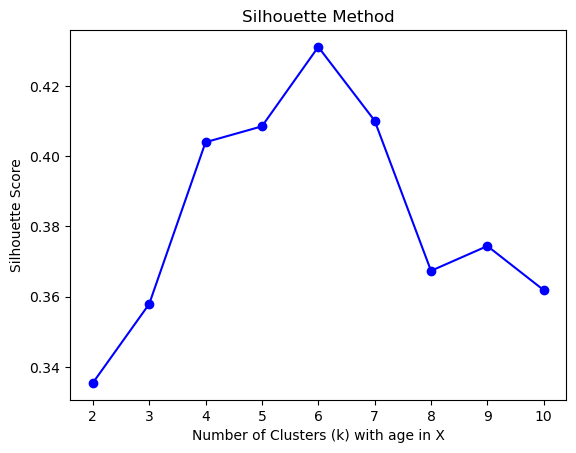

In [12]:
# With age in X

silhouette_scores = []

for k in range(2, 11):
    kmeans_age = KMeans(n_clusters=k, random_state=42)
    labels = kmeans_age.fit_predict(X_age)
    score = silhouette_score(X_age, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k) with age in X')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [13]:
# Without age in X

kmeans = KMeans(n_clusters = 5, random_state = 50).fit(X)
kmeans.labels_

c:\Users\bella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [14]:
# With age in X

kmeans_age = KMeans(n_clusters = 6, random_state = 50).fit(X)
kmeans_age.labels_

c:\Users\bella\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5], dtype=int32)

In [15]:
# Without age in X

kmeans.cluster_centers_

array([[-0.20091257, -0.02645617],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

In [16]:
# With age in X

kmeans_age.cluster_centers_

array([[-0.20091257, -0.02645617],
       [-1.32954532,  1.13217788],
       [ 0.75632724,  1.27092084],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [ 2.06703817,  1.0958772 ]])

## 6) Evaluating the model

In [17]:
# Without age in X

silhouette_score(X, kmeans.labels_, metric='euclidean')

0.5546571631111091

In [18]:
# With age in X

silhouette_score(X_age, kmeans_age.labels_, metric='euclidean')

0.3098971957729483

## 7) Visualizing clusters

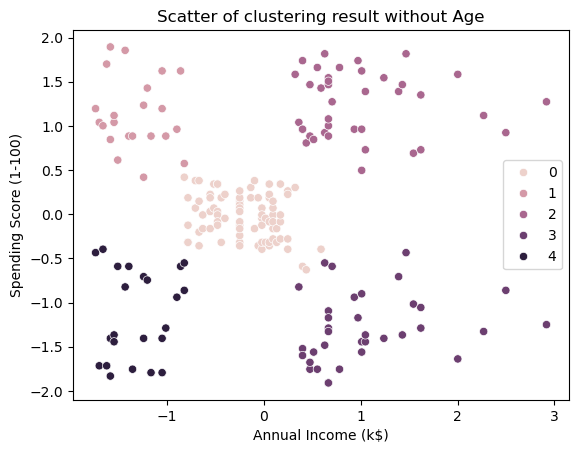

In [19]:
# Without age in X

sns.scatterplot(data = X, x='Annual Income (k$)', y = 'Spending Score (1-100)', hue = kmeans.labels_)
plt.legend()
plt.title("Scatter of clustering result without Age")
plt.show()

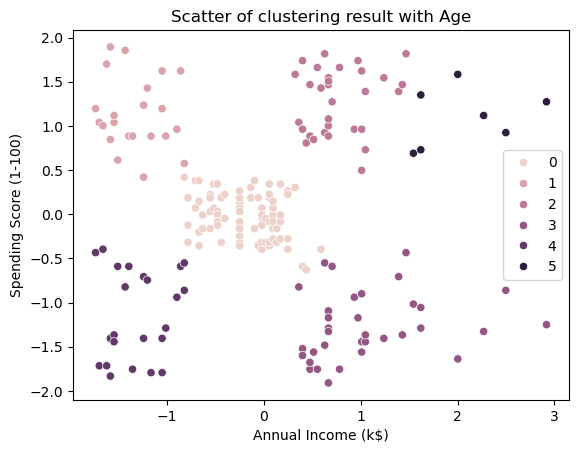

In [20]:
# With age in X

sns.scatterplot(data = X_age, x='Annual Income (k$)', y = 'Spending Score (1-100)', hue = kmeans_age.labels_)
plt.legend()
plt.title("Scatter of clustering result with Age")
plt.show()

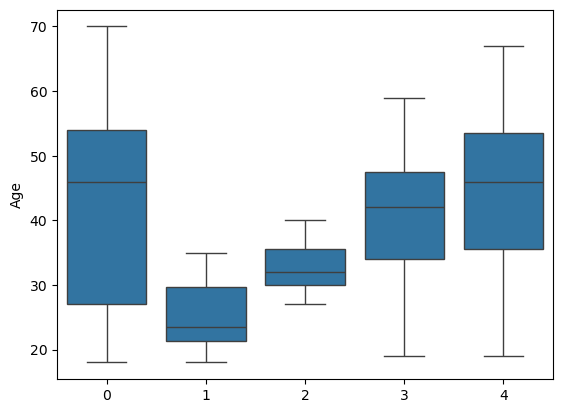

In [21]:
# Without age in X

sns.boxplot(x = kmeans.labels_, y = age)
plt.show()

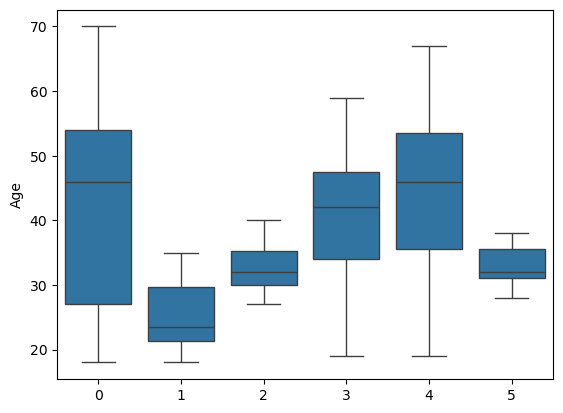

In [22]:
# With age in X

sns.boxplot(x = kmeans_age.labels_, y = age)
plt.show()

## CONCLUSION

The best K-means model is the model which does not use the age in X. It gives a realistic silhouette score without outliers in clusters